In [1]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 4] # sets the size of figures in this notebook

data = pd.read_csv("ExtractedTweets.csv")

In [2]:
#Using about 80% of data to train and 20% of data to test

np.random.seed(1855)
train_index = sorted(np.random.choice(range(data.shape[0]),69168,replace=False)) #69168 = .8 * 86460
test_index = np.delete(range(data.shape[0]),train_index)

train_data = data.Tweet.values[train_index]
test_data = data.Tweet.values[test_index]
train_labels = data.Party.values[train_index]
test_labels = data.Party.values[test_index]

model = make_pipeline(TfidfVectorizer(), MultinomialNB()) #applying first the tf idf method and then Multinomial naive Bayes
model.fit(train_data, train_labels) # fit model
labels = model.predict(test_data) # predict labels

In [3]:
np.sum(labels == test_labels)/len(test_labels) #correctly predicts about 80% of labels

0.8011219060837381

In [4]:
#predicting new labels
def predict_party(tweet):
    return(model.predict(np.array([tweet]))[0])

print(predict_party("I think we should lower taxes"))

print(predict_party("I think we should help the poor"))

Republican
Democrat


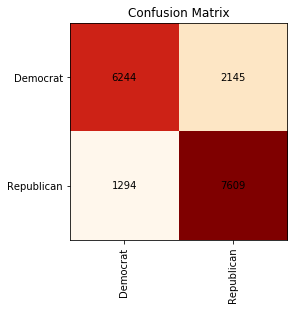

In [5]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels, labels) # creates confusion matrix

fig, ax = plt.subplots()
ax.imshow(cm, cmap='OrRd') # making the heat-map image 
ax.set_xticks(np.arange(2)) # define tick-mark positions
ax.set_yticks(np.arange(2))
ax.set_xticklabels(np.array(["Democrat","Republican"]), rotation = 90) # label ticks with newsgroups
ax.set_yticklabels(np.array(["Democrat","Republican"])) 
ax.set_ylim(len(cm)-0.5, -0.5) # there is a bug in matplotlib that offsets y-limits in heatmaps

for i in range(2): # Loop over data dimensions and create text annotations:
    for j in range(2):
        text = ax.text(j, i, cm[i, j], ha="center", va="center", color="k")
ax.set_title("Confusion Matrix");

In [6]:
#ted cruz's latest tweet

predict_party("""A whole lot of people in America have been sleeping on the danger that #China poses... 
@MichaelJKnowles
 and I discuss in the latest episode of #Verdict: https://youtube.com/watch?v=h3PQ3MQ5j7A""")

'Republican'

In [7]:
#bernie sander's latest tweet

predict_party("""The Walton family is worth $165.7 billion. Do we really need to have families in America worth more than $100 billion? 

When half of our people live paycheck to paycheck? 

Let us, together, have the courage to take on the greed of the corporate elite.""")

'Democrat'

In [8]:
#elizabeth warren's latest tweet

predict_party("""Jared Kushner shouldn’t be overseeing anything—much less part of a national response to this crisis.

We need a bold, actionable plan that prepares us for a post-coronavirus economy that keeps our communities safe—not a vision board from these two.""")

'Democrat'

In [13]:
predict_party("")

'Democrat'